# Step 1: Data Loading and Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [4]:
# Read the data from csv
df_bikes = pd.read_csv("day.csv")

In [9]:
# Head of the dataset
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Shape of the data
df_bikes.shape

(730, 16)

In [13]:
# information about the data
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [15]:
# data describe
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: EDA

### Map all values of categorical variables from data dictionary .

In [17]:
# mapping the season column
df_bikes.season = df_bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [19]:
# mapping the month column
df_bikes.mnth = df_bikes.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [21]:
#mapping the weekday column
df_bikes.weekday = df_bikes.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [23]:
# mapping the weathersit column
df_bikes.weathersit = df_bikes.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

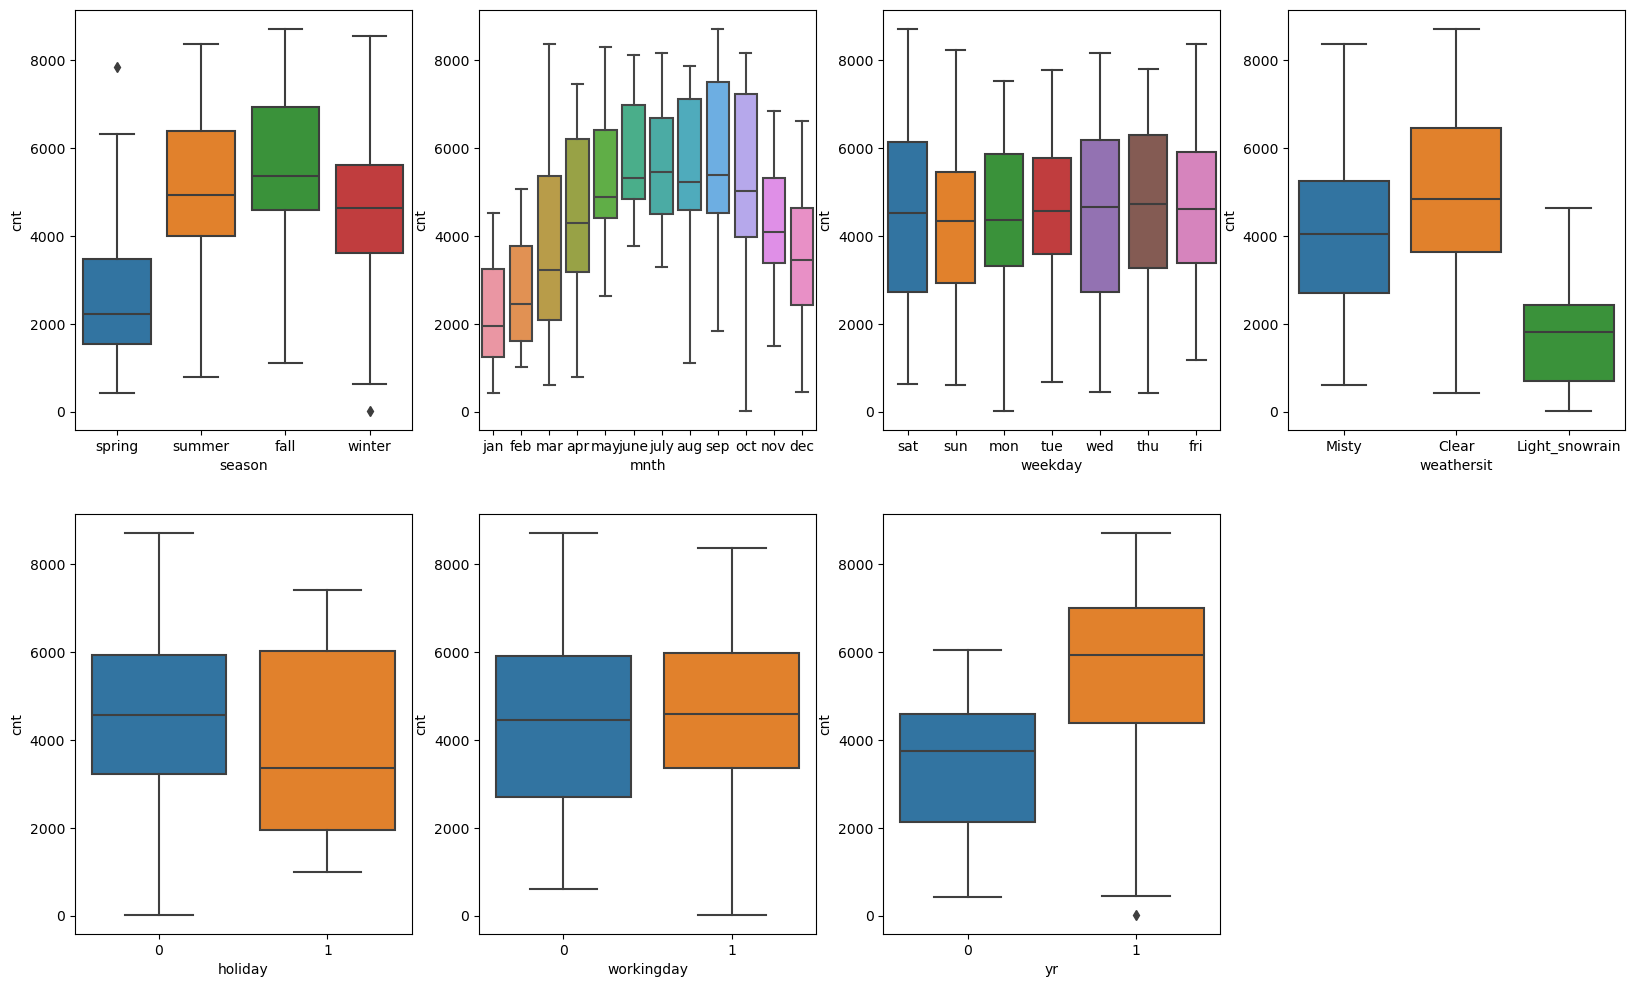

In [25]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikes)
plt.show()

In [42]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    yr_str = df_bikes.yr.apply(str)
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df_bikes)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df_bikes, hue=yr_str,palette='Set1')
    plt.show()

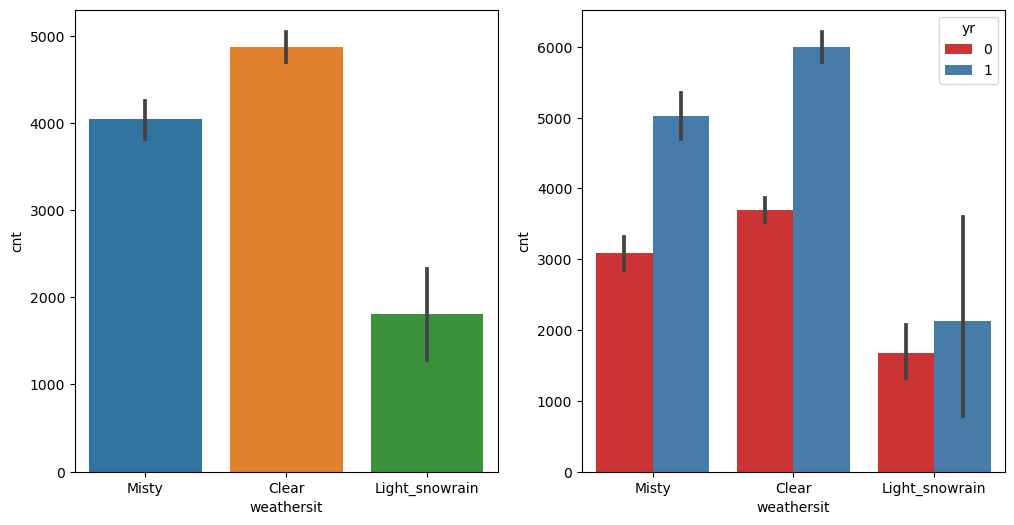

In [46]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

#### count is more during clear weathersit and increased in 2019

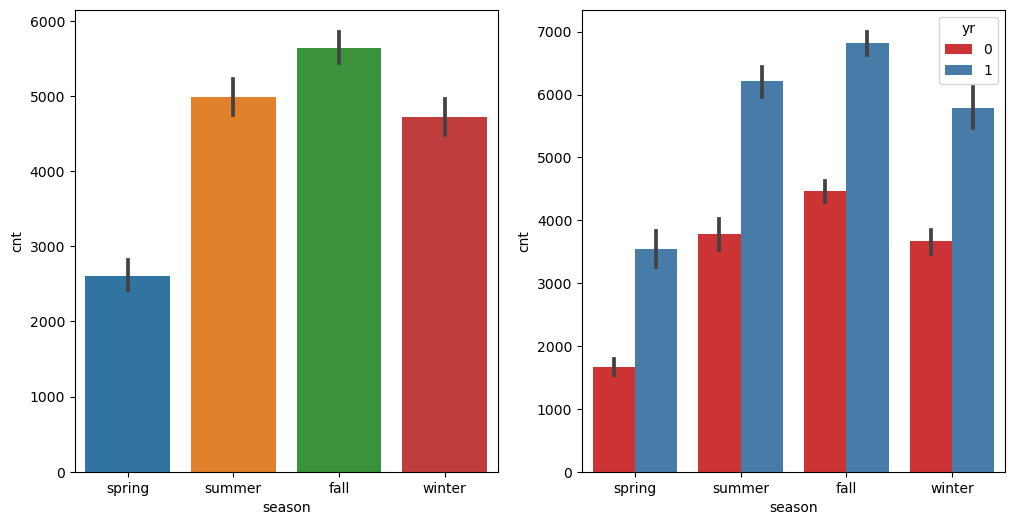

In [44]:
# plotting visualization for season column

plot_cat_columns('season')

##### Fall and summer season have more bikes on rent and this has increased from 2018 to 2019

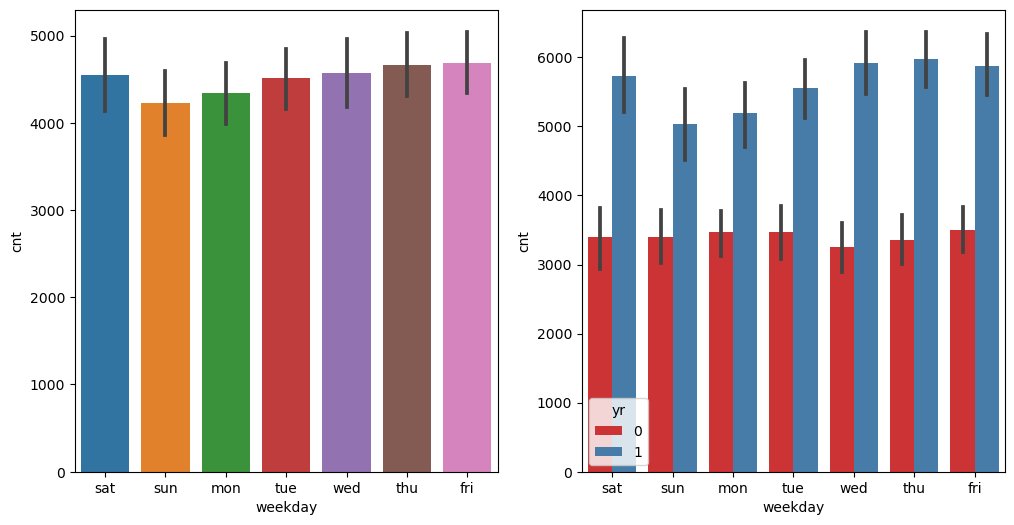

In [50]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

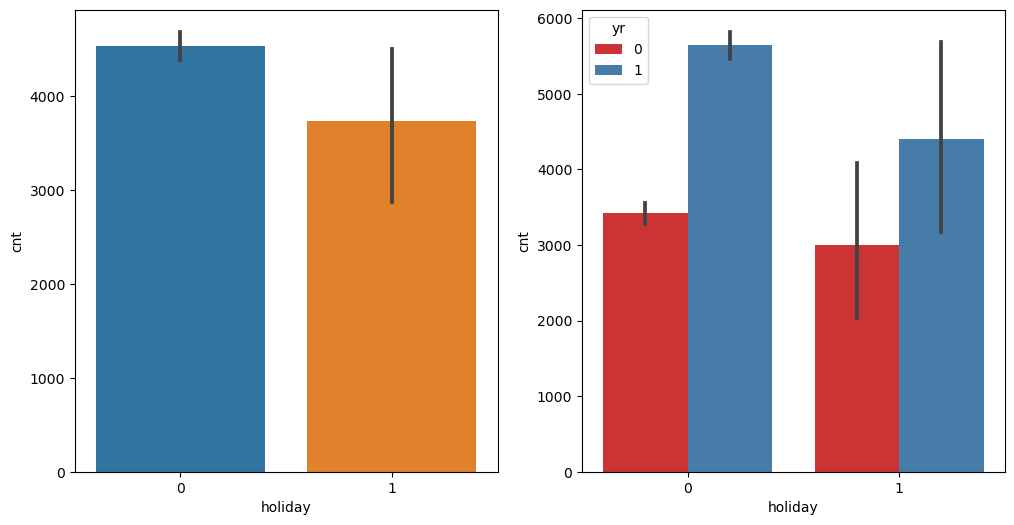

In [52]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

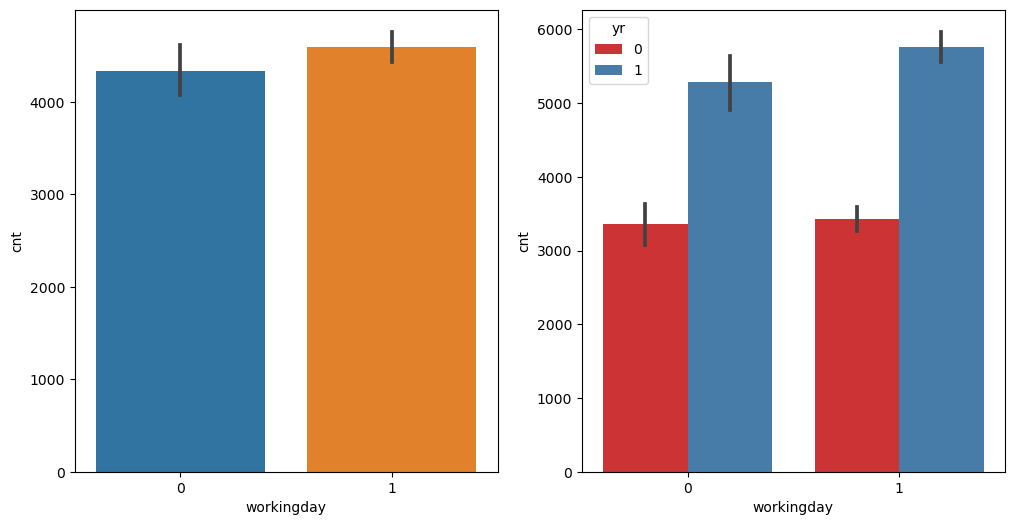

In [54]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

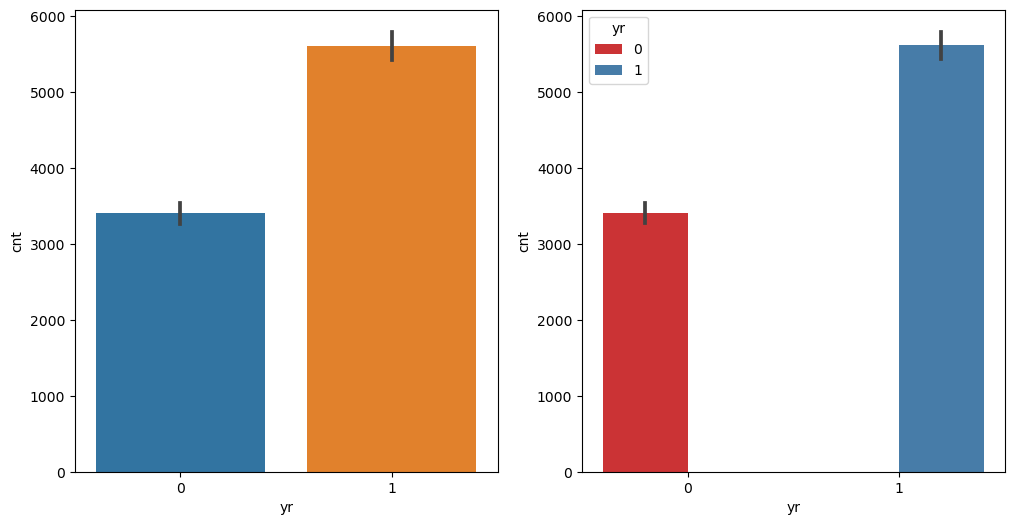

In [56]:
# plotting visualization for year column

plot_cat_columns('yr')

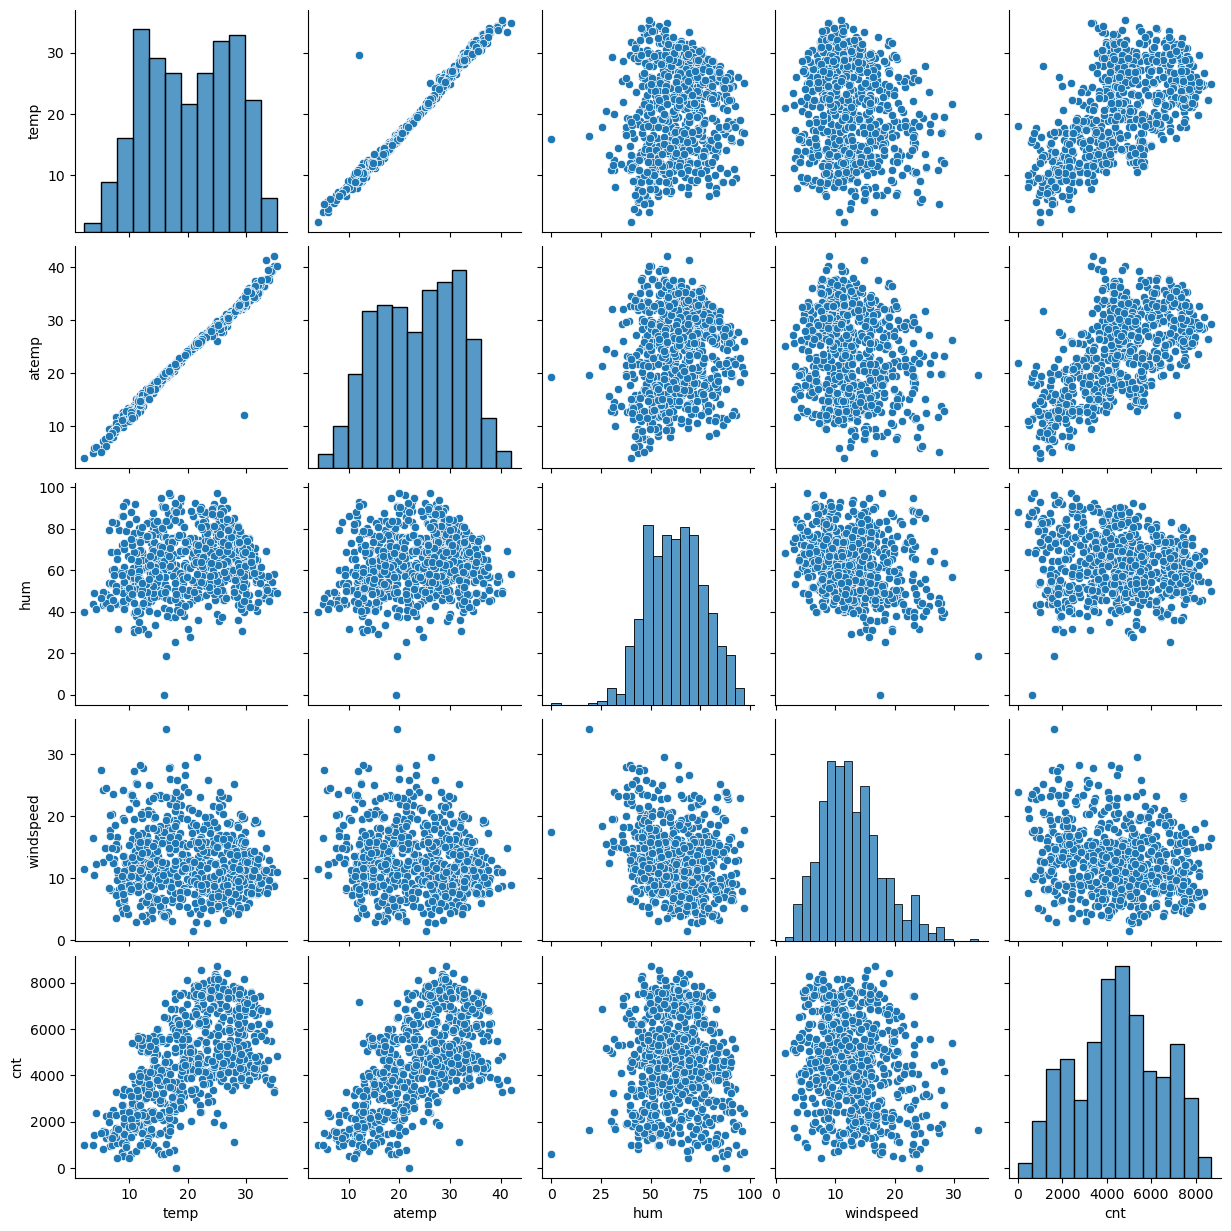

In [58]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df_bikes,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

# Step 3: Data Preprocessing

In [60]:
#  drop columns instant,dteday ,casual and registered.
# instant is a unique index column which is not idependent and no significance.
# dteday column feature data can interpret from yr,mnth and weekday columns.
# casual and registered columns are not features and sum of these is euqula to cnt column.

df_bikes=df_bikes.drop(['instant','dteday','casual','registered'],axis=1)

In [62]:
#  checking the data
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [64]:
# information about the data after mapping
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [66]:
# data describe
df_bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Create the dummy varaibles for all categorical variables.


In [69]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months=pd.get_dummies(df_bikes.mnth,dtype=int,drop_first=True)
weekdays=pd.get_dummies(df_bikes.weekday,drop_first=True,dtype=int)
weathersit=pd.get_dummies(df_bikes.weathersit,drop_first=True,dtype=int)
seasons=pd.get_dummies(df_bikes.season,drop_first=True,dtype=int)

In [71]:
# Merging  the dataframe, with the dummy variable dataset. 

df_bikes=pd.concat([df_bikes,months,weekdays,weathersit,seasons],axis=1)

In [73]:
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [75]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    int32  
 13  dec             730 non-null    int32  
 14  feb             730 non-null    int32  
 15  jan             730 non-null    int32  
 16  july            730 non-null    int32  
 17  june            730 non-null    int

In [77]:
# Drop unnecessary columns as we have created the dummies for it.

df_bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [79]:

df_bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [81]:
df_bikes.shape

(730, 30)

In [83]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

# Step 4: Splitting the Data into Training and Testing Sets

In [85]:
# Train and Test split

np.random.seed(0)
df_train, df_test = train_test_split(df_bikes, train_size = 0.7, random_state = 100)

### Rescaling the Features 

In [87]:
# Min Max scaling
scaler = MinMaxScaler()

In [89]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [91]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [93]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


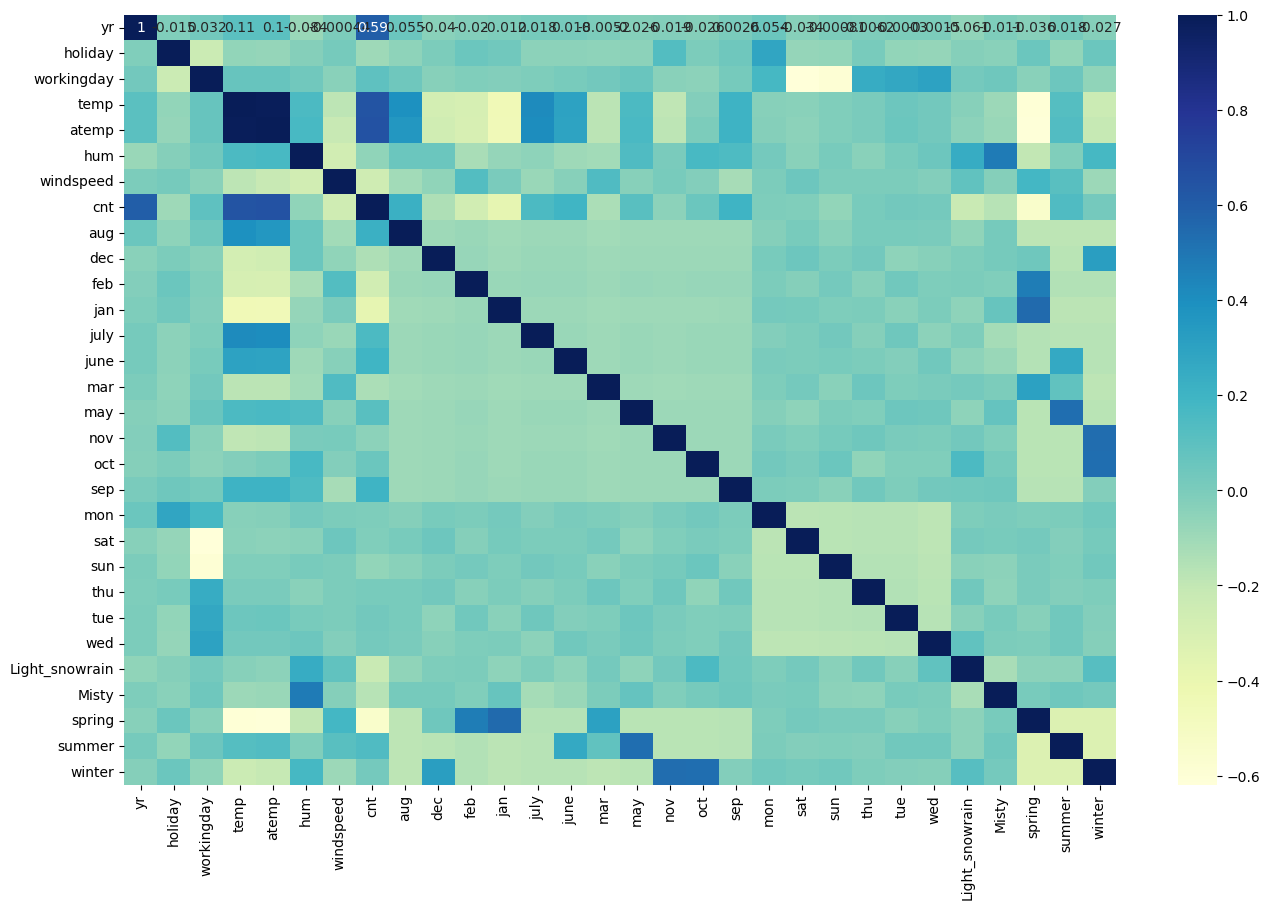

In [95]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


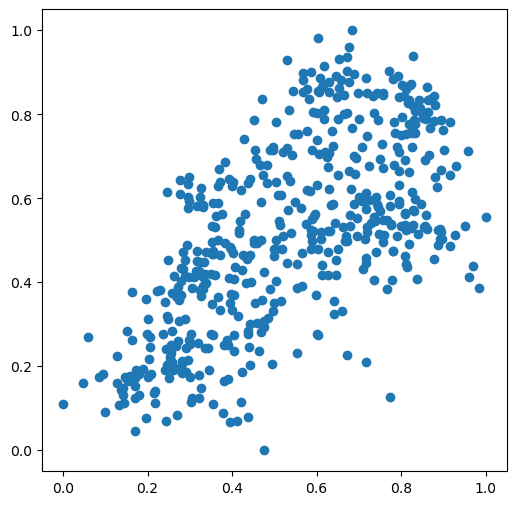

In [97]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

# Step 5: Building Linear Model

## Dividing into X and Y sets for the model building

In [99]:
y_train = df_train.pop('cnt')
X_train = df_train

####  Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

 ##### Manual feature selection 

##### So, we pick temp as the first variable and we'll try to fit a regression line to that.

In [104]:
# Manual feature selection 

# Add a constant
X_train_lm = sm.add_constant(X_train['temp'])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [106]:
# Check the parameters obtained
lr.params

const    0.169031
temp     0.640944
dtype: float64

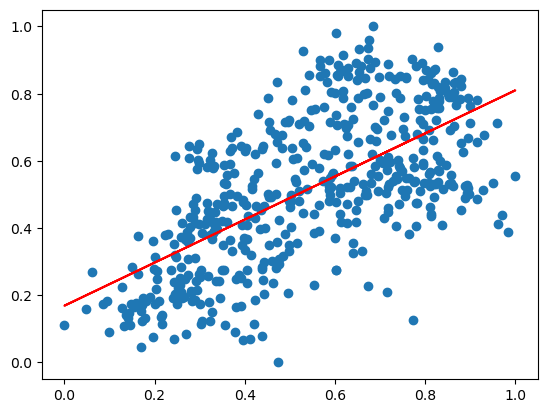

In [108]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.641*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [110]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           2.46e-61
Time:                        21:04:42   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

### Adding another variable

The R-squared value obtained is `0.416`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [113]:
 # Manual feature selection 
# Assign year feature variables to X_train_lm
X_train_lm = X_train[['temp', 'yr']]


In [115]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_lm)

lr1 = sm.OLS(y_train, X_train_lm).fit()

lr1.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [117]:
# Check the summary
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          3.34e-130
Time:                        21:05:32   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.0

#### We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.692` from `0.416`.
 Let's go ahead and add another variable, `atemp`.

In [120]:
# Manual feature selection 
# Assign atemp feature variables to X_train_lm
X_train_lm = X_train[['temp', 'yr','atemp']]

In [122]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_lm)

lr3 = sm.OLS(y_train, X_train_lm).fit()

lr3.params

const    0.072045
temp     0.079760
yr       0.237193
atemp    0.542002
dtype: float64

In [124]:
# Check the summary
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     388.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          9.71e-131
Time:                        21:06:57   Log-Likelihood:                 343.36
No. Observations:                 510   AIC:                            -678.7
Df Residuals:                     506   BIC:                            -661.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.015      4.813      0.0

##### We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [126]:
# Check all the columns of the dataframe

df_bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [128]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const             0.243298
yr                0.232539
holiday           0.010892
workingday        0.096273
temp              0.387984
atemp             0.059045
hum              -0.152016
windspeed        -0.183604
aug               0.022270
dec              -0.044274
feb              -0.032316
jan              -0.063064
july             -0.032657
june              0.006012
mar               0.001555
may               0.025541
nov              -0.039818
oct               0.007713
sep               0.086761
mon              -0.021624
sat               0.095176
sun               0.040957
thu              -0.009730
tue              -0.018439
wed              -0.005897
Light_snowrain   -0.254975
Misty            -0.059521
spring           -0.045355
summer            0.042369
winter            0.107081
dtype: float64

In [130]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.81e-180
Time:                        21:07:42   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2433      0.035      6.

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

Build the Linear model with Recursive feature elimination

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [138]:
calculateVIF(X_train)

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
19,sat,19.71
20,sun,18.34
26,spring,10.77
28,winter,9.46
27,summer,8.29
15,nov,6.79
7,aug,6.47


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mar` as it has a very high VIF of `0.95`. Let's go ahead and drop this variables

In [141]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['mar'], axis = 1)

# Build a another fitted model
X_train_lm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_5.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.75e-181
Time:                        21:09:52   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2441      0.033      7.

,Features,VIF
2,workingday,74.90
3,temp,66.84
4,atemp,55.99
18,sat,17.21
19,sun,16.19
25,spring,9.66
27,winter,9.13
26,summer,7.99
7,aug,5.74
11,july,5.11


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Oct` as it has a very high p-value of `0.831`. Let's go ahead and drop this variables

In [144]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['oct'], axis = 1)

# Build a another fitted model
X_train_lm = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_6.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.68e-182
Time:                        21:10:33   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2455      0.032      7.

,Features,VIF
2,workingday,72.29
3,temp,66.83
4,atemp,55.99
17,sat,16.60
18,sun,15.58
24,spring,9.26
26,winter,7.14
25,summer,6.84
7,aug,4.90
11,july,4.42


### Dropping the Variable and Updating the Model
As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, june as it has a very high p-value of 0.852. Let's go ahead and drop this variables

In [147]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['june'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_7.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.55e-183
Time:                        21:11:12   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2457      0.032      7.

,Features,VIF
2,workingday,72.18
3,temp,60.92
4,atemp,54.96
16,sat,16.55
17,sun,15.54
23,spring,8.60
24,summer,6.66
25,winter,6.34
1,holiday,3.98
7,aug,3.19


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `wed` as it has a very high p-value of `0.697`. Let's go ahead and drop this variables


In [153]:

# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['wed'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_8.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.52e-184
Time:                        21:12:07   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

,Features,VIF
2,workingday,70.22
3,temp,60.77
4,atemp,54.77
16,sat,16.52
17,sun,15.51
22,spring,8.60
23,summer,6.66
24,winter,6.34
1,holiday,3.92
7,aug,3.19


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a very high p-value of `0.702`. Let's go ahead and drop this variables


In [156]:

# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['atemp'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_9 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_9.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.42e-185
Time:                        21:12:46   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2447      0.032      7.

,Features,VIF
2,workingday,70.18
15,sat,16.52
16,sun,15.51
21,spring,8.55
22,summer,6.60
23,winter,6.27
3,temp,4.92
1,holiday,3.91
6,aug,3.17
10,july,2.81


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a very high p-value of `0.691`. Let's go ahead and drop this variables


In [159]:

# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['holiday'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_10 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_10.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.42e-185
Time:                        21:16:05   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2539      0.048      5.

,Features,VIF
3,hum,36.38
2,temp,24.25
1,workingday,20.83
20,spring,8.39
21,summer,6.70
22,winter,6.69
14,sat,5.91
15,sun,5.58
4,windspeed,5.13
5,aug,3.26


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `thu` as it has a very high p-value of `0.640`. Let's go ahead and drop this variables


In [162]:


# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['thu'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_11 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_11.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.36e-186
Time:                        21:16:27   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2512      0.048      5.

,Features,VIF
3,hum,36.34
2,temp,24.14
1,workingday,20.80
19,spring,8.36
21,winter,6.68
20,summer,6.68
14,sat,5.81
15,sun,5.49
4,windspeed,5.12
5,aug,3.26


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `aug` as it has a very high p-value of `0.520`. Let's go ahead and drop this variables


In [165]:

# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['aug'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_12 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_12.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.47e-187
Time:                        21:16:44   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2594      0.046      5.

,Features,VIF
3,hum,35.48
2,temp,22.61
1,workingday,19.86
18,spring,6.09
13,sat,5.52
14,sun,5.30
4,windspeed,5.09
20,winter,4.45
19,summer,3.76
7,jan,2.43


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `tue` as it has a very high p-value of `0.299`. Let's go ahead and drop this variables


In [168]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['tue'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_13 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_13.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          3.51e-188
Time:                        21:17:21   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2580      0.046      5.

,Features,VIF
3,hum,35.40
2,temp,22.60
1,workingday,19.79
17,spring,6.09
13,sat,5.49
14,sun,5.26
4,windspeed,5.09
19,winter,4.45
18,summer,3.75
7,jan,2.43


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mon` as it has a very high p-value of `0.271`. Let's go ahead and drop this variables


In [171]:

# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['mon'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_14 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_14.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          5.20e-189
Time:                        21:17:37   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2478      0.045      5.

,Features,VIF
3,hum,34.75
2,temp,22.48
1,workingday,19.11
16,spring,6.06
12,sat,5.10
4,windspeed,5.06
13,sun,4.89
18,winter,4.40
17,summer,3.71
7,jan,2.42


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `may` as it has a very high p-value of `0.186`. Let's go ahead and drop this variables


In [174]:

# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['may'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_15= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_15.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          9.80e-190
Time:                        21:17:59   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2368      0.045      5.

,Features,VIF
3,hum,34.64
2,temp,22.30
1,workingday,18.92
15,spring,6.05
11,sat,5.04
4,windspeed,4.99
12,sun,4.85
17,winter,4.40
16,summer,3.11
7,jan,2.42


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `feb` as it has a very high p-value of `0.119`. Let's go ahead and drop this variables


In [177]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['feb'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_16= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_16.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.52e-190
Time:                        21:18:20   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2235      0.044      5.

,Features,VIF
3,hum,34.19
2,temp,21.56
1,workingday,18.84
14,spring,5.06
10,sat,5.03
4,windspeed,4.99
11,sun,4.83
16,winter,4.40
15,summer,3.09
13,Misty,2.35


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `sun` as it has a very high p-value of `0.054`. Let's go ahead and drop this variables


In [180]:

# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['sun'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_17= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_17.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          1.20e-190
Time:                        21:18:43   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2690      0.037      7.

,Features,VIF
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
13,spring,4.50
15,winter,4.11
14,summer,2.88
12,Misty,2.32
0,yr,2.09
10,sat,1.86


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `dec` as it has a very high p-value of `0.022`. Let's go ahead and drop this variables


In [183]:
# Dropping highly correlated variables and insignificant variables


# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['dec'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_18= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_18.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          1.19e-190
Time:                        21:19:02   Log-Likelihood:                 518.57
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     494   BIC:                            -937.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2514      0.036      6.

,Features,VIF
3,hum,29.38
2,temp,17.75
4,windspeed,4.77
1,workingday,4.73
12,spring,4.50
14,winter,3.85
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.84


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `nov` as it has a very high p-value of `0.109`. Let's go ahead and drop this variables


In [189]:
# Dropping highly correlated variables and insignificant variables


# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['nov'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_19= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_19.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          1.54e-191
Time:                        21:20:15   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2307      0.036      6.

,Features,VIF
3,hum,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
10,spring,4.18
12,winter,3.39
11,summer,2.84
9,Misty,2.28
0,yr,2.08
7,sat,1.84


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `jan` as it has a very high p-value of `0.044`. Let's go ahead and drop this variables


In [187]:



# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['jan'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_20= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_20.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.6
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          7.00e-191
Time:                        21:19:35   Log-Likelihood:                 516.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2387      0.036      6.

,Features,VIF
3,hum,28.45
2,temp,16.97
4,windspeed,4.76
1,workingday,4.72
11,spring,4.20
13,winter,3.82
12,summer,2.85
10,Misty,2.29
0,yr,2.08
8,sat,1.84


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `spring` as it has a very high p-value of `0.006`. Let's go ahead and drop this variables


In [193]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['spring'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_21= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_21.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          4.14e-191
Time:                        21:21:22   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1712      0.028      6.

,Features,VIF
3,hum,16.21
2,temp,10.36
1,workingday,4.54
4,windspeed,3.73
9,Misty,2.10
0,yr,2.03
7,sat,1.79
10,summer,1.76
11,winter,1.70
5,july,1.55


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `july` as it has a very high p-value of `0.015`. Let's go ahead and drop this variables
    

In [196]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['july'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_22= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_22.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          5.10e-191
Time:                        21:21:48   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1705      0.029      5.

,Features,VIF
3,hum,15.96
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
8,Misty,2.10
0,yr,2.02
6,sat,1.79
10,winter,1.66
9,summer,1.58
5,sep,1.20


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF. Let's go ahead and drop this variables


In [199]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['hum'], axis = 1)

# Build another  fitted model
X_train_lm = sm.add_constant(X_train)
lr_23= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_23.summary())

# Calculate the VIFs again for the new model
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          3.13e-188
Time:                        21:22:09   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_snowrain,1.08


#### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
We can cosider the above model all the predictors seems to be significant,very low multicolinearity.
F-Statistics value of 253. (which is greater than 1) and the p-value of 3.13e-188 i.e almost equals to zero, states that the overall model is significant¶

# Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [841]:
X_train_lm

,const,yr,workingday,temp,windspeed,sep,sat,Light_snowrain,Misty,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,1,1,0


In [205]:
y_train_pred = lr_23.predict(X_train_lm)

Text(0.5, 0, 'Errors')

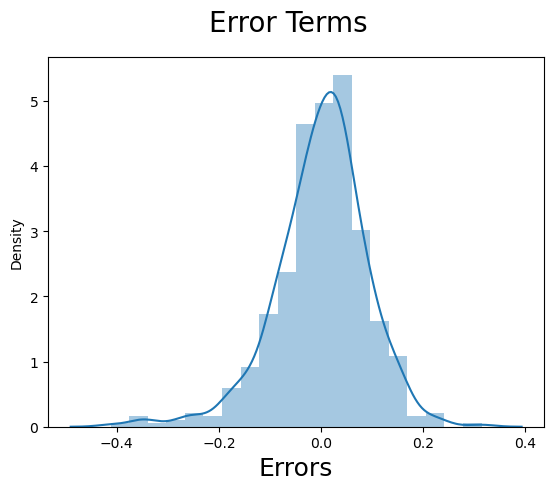

In [207]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [211]:
#Multi Colinearity
calculateVIF(X_train)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_snowrain,1.08


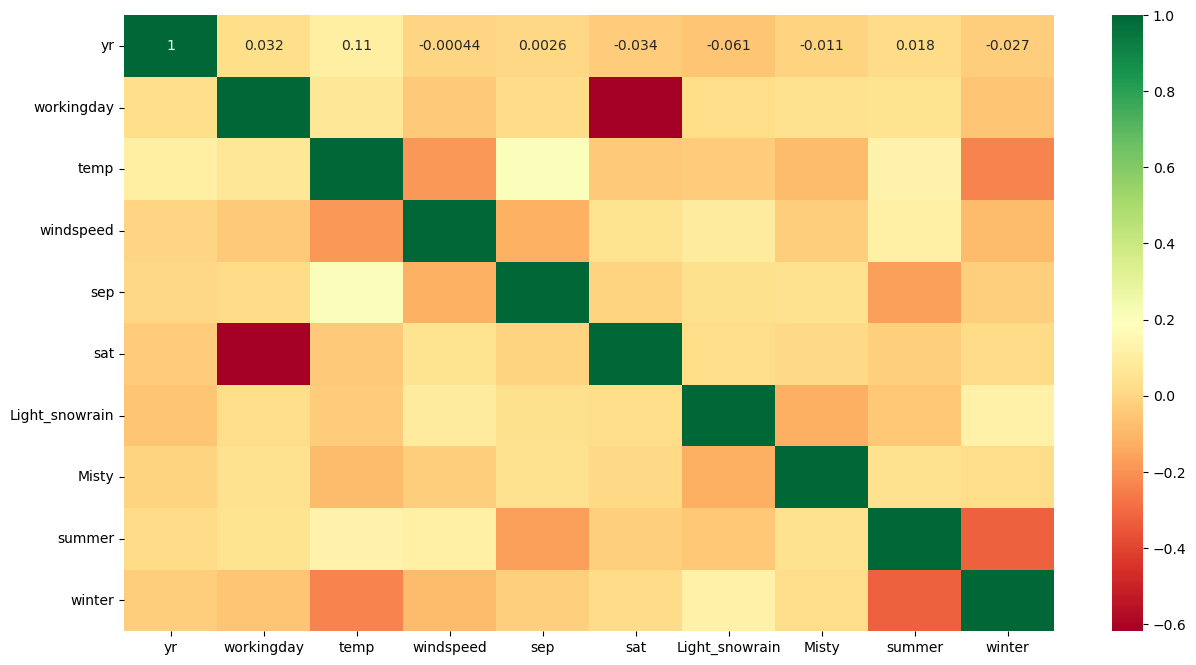

In [213]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn")
plt.show()

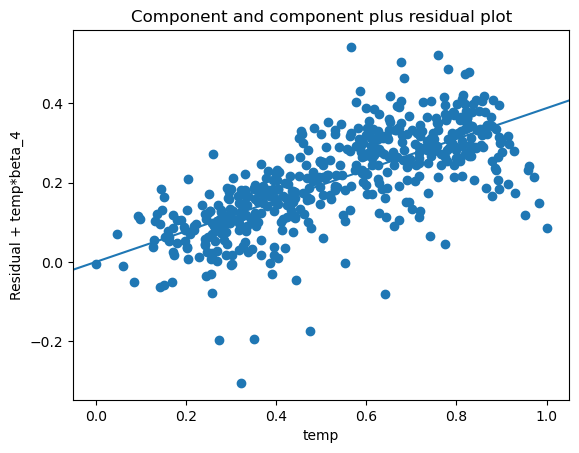

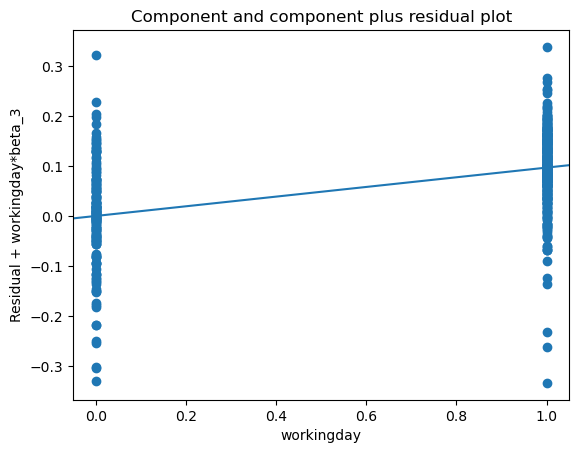

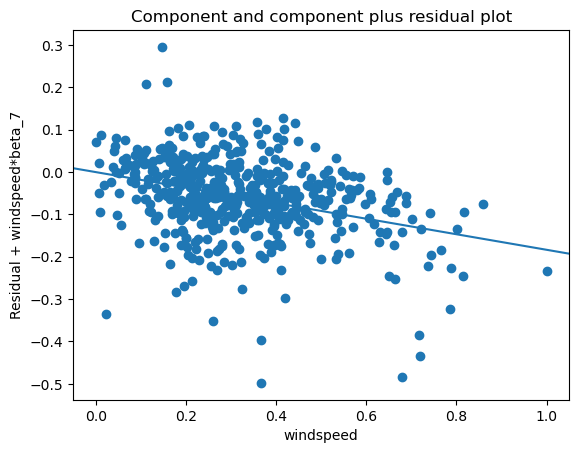

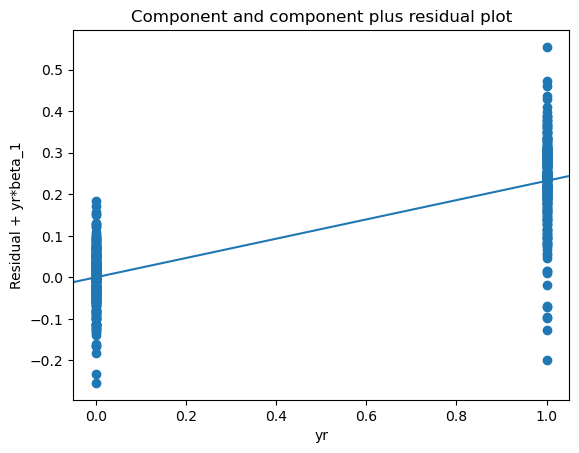

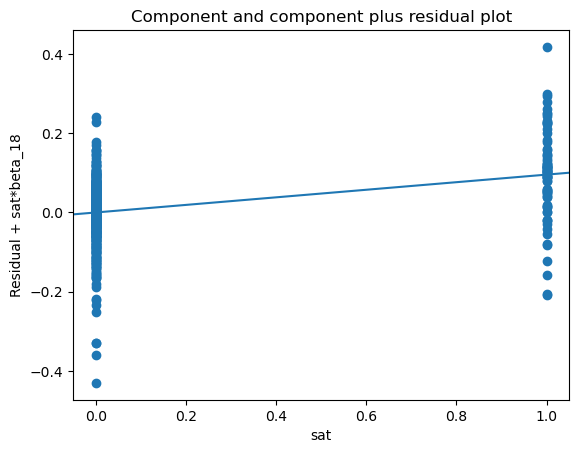

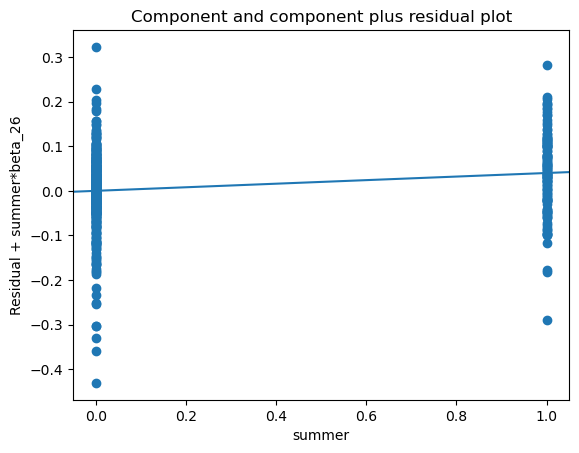

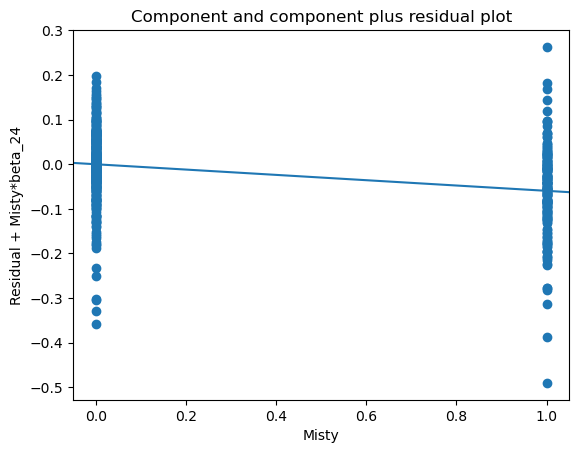

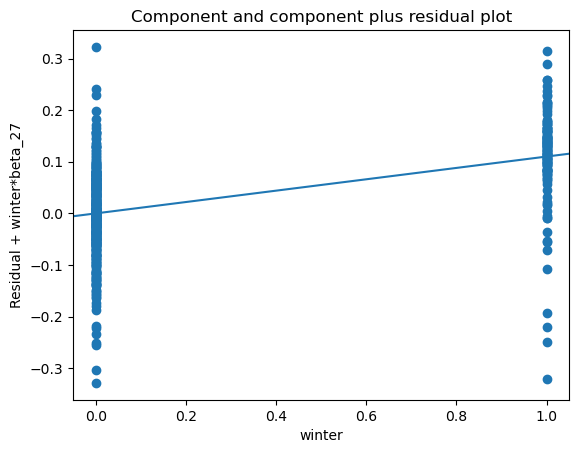

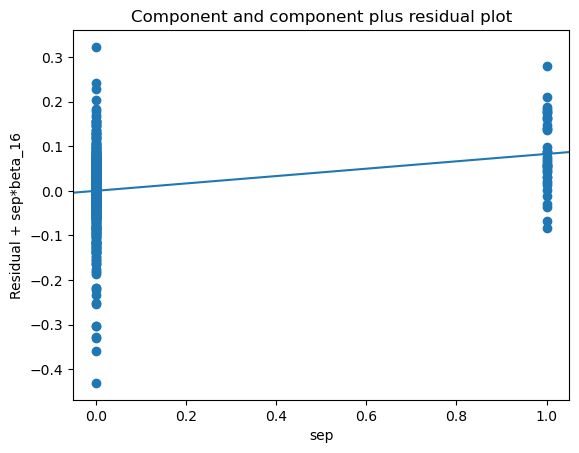

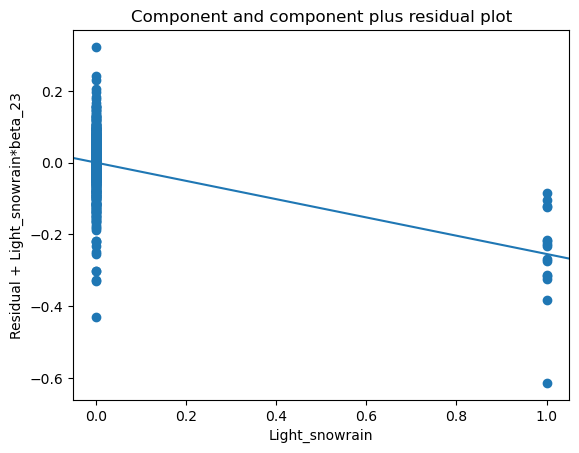

In [215]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot
sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'workingday')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()
sm.graphics.plot_ccpr(lr_6, 'yr')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sat')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'summer')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Misty')
plt.show()
sm.graphics.plot_ccpr(lr_6, 'winter')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Light_snowrain')
plt.show()

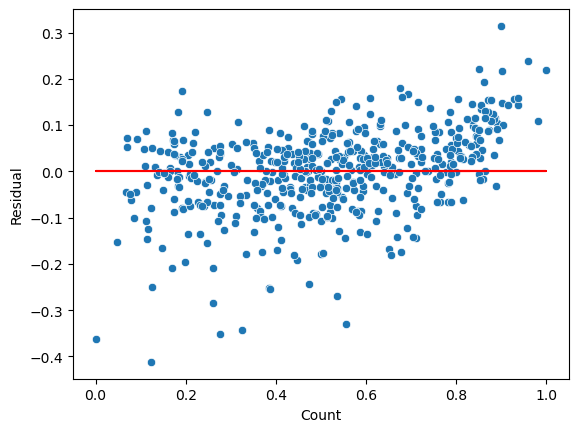

In [217]:
#### Homoscedasticity
y_train_pred = lr_23.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

###### No specific patterns observed.

# Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [221]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [223]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  Dividing into X_test and y_test¶

In [226]:
y_test = df_test.pop('cnt')

#Creating X_test dataframe by dropping variables 
X_test = df_test[X_train.columns]

In [228]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [230]:
# Making predictions using the final model

y_pred = lr_23.predict(X_test_lm)



In [232]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7961

In [249]:
lr_test= sm.OLS(y_test, X_test_lm).fit()
# Print the summary of the model
print(lr_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     87.66
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           3.96e-69
Time:                        21:41:38   Log-Likelihood:                 203.51
No. Observations:                 220   AIC:                            -385.0
Df Residuals:                     209   BIC:                            -347.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0413      0.030      1.

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred_lm')

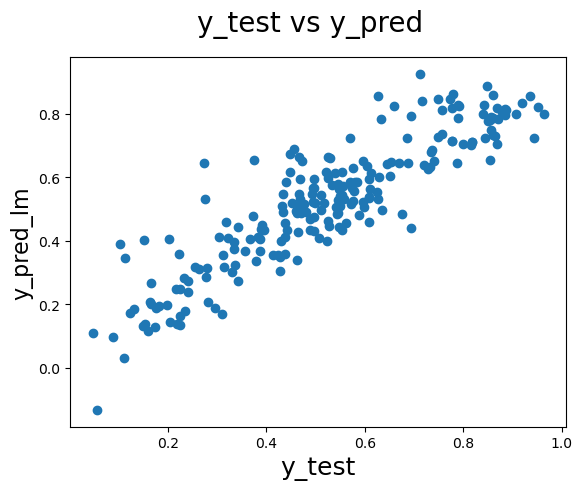

In [238]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_lm', fontsize = 16)      

In [240]:
round(lr_23.params,4)

const             0.0750
yr                0.2331
workingday        0.0561
temp              0.5499
windspeed        -0.1552
sep               0.0974
sat               0.0675
Light_snowrain   -0.2871
Misty            -0.0800
summer            0.0886
winter            0.1307
dtype: float64

In [242]:
 #Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7864


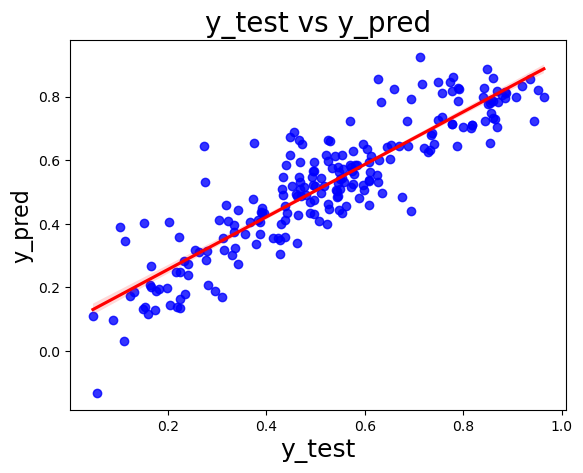

In [244]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

We can see that the equation of our best fitted line is:


$ cnt = 0.0750 + 0.2331  \times  yr + 0.0561  \times  workingday + 0.5499 \times temp -0.1552 \times windspeed +0.0974 \times sep +0.0675 \times sat -0.2871 \times Light_snowrain -0.0800 \times Misty + 0.0886 \times  summer +0.1307 \times winter  $



# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.835
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.832

#### Demand of bikes depend on temp,workingday,windspeed,yr,sat,summer,Misty,winter,sep,Light_snowrain.